cross the results of the 10 folds
Simplfied recogntion : Bloom
ER RFIAP : Boulahia, in RFIAP
seen in RFIAP 2018, Boulahia, Anquetil, Kulpa, Detection précoce

In [7]:
import os
from typing import List
import numpy as np
from matplotlib import pyplot as plt

pathDB = "C:\\workspace2\\Datasets\\MSRC6_IconicC4\\"
separator = "\\"
pathSaveResult = "C:\\workspace2\\Datasets\\MSRC6_IconicC4\\Log\\MultiFold_1606\\"

modelNames = [
"polar-oath-162",
"absurd-firebrand-168",
"gallant-lion-189",
"splendid-fog-188",
# "likely-breeze-182",
"cerulean-violet-181",
"desert-aardvark-184",
"valiant-sun-186",
"bumbling-morning-187",
"gentle-totem-173"]

In [8]:
nbClass = 6+1

#Simplified bloom
nbFrameSimplified = 40+1
GoodPredictions = np.zeros([nbFrameSimplified])
PredictionsDone = np.zeros([nbFrameSimplified])

#ER Boulahia RFIAP
nbFrameERRFIAP = 30+1+10
TruePositive =np.zeros([nbFrameERRFIAP,nbClass])
FalsePositive =np.zeros([nbFrameERRFIAP,nbClass])
FalseNegative =np.zeros([nbFrameERRFIAP,nbClass])
nbAction =np.zeros([nbFrameERRFIAP,nbClass])

In [9]:
for modelName in modelNames:
    pathModel = pathDB+"Log"+separator+modelName+separator
    pathFileSimplified = pathModel+"resultsEarlySimplifiedBloom.txt"
    pathER_RFIAP = pathModel + "resultsEarlyBoulahiaRFIAP.txt"

    #Simplified
    f = open(pathFileSimplified,"r")
    lines = f.readlines()
    f.close()

    GoodPredictions += np.array(list(map(float,lines[3].split(";"))))
    PredictionsDone += np.array(list(map(float,lines[5].split(";"))))


    #ER RFIAP
    f = open(pathER_RFIAP,"r")
    lines:List[str] = f.readlines()[1:]# skip the first frame
    f.close()

    for i in range(nbFrameERRFIAP):
    #17 lines per Frame, lines 2,4,6,8 are for TP,FP,FN,nbAct
        theStartLine = i*18
        if(lines[theStartLine].startswith("T-")):#ok that good
            TruePositive[i]+=np.array(list(map(float,lines[theStartLine+2].split(";"))))
            FalsePositive[i]+=np.array(list(map(float,lines[theStartLine+4].split(";"))))
            FalseNegative[i]+=np.array(list(map(float,lines[theStartLine+6].split(";"))))
            nbAction[i]+=np.array(list(map(float,lines[theStartLine+8].split(";"))))
        else: # the end of file
            break

In [10]:
#Simplfieid
accuracyPerFrame = GoodPredictions/PredictionsDone

res = ""
res+="accuracyPerFrame,\n"+str(" ; ".join(list(["{:.2f}".format(v) for v in accuracyPerFrame])))+"\n"
res+="GoodPredictions,\n"+str(" ; ".join(list(["{:.2f}".format(v) for v in GoodPredictions])))+"\n"
res+="PredictionsDone,\n"+str(" ; ".join(list(["{:.2f}".format(v) for v in PredictionsDone])))+"\n"
print(res)

if(not os.path.exists(pathSaveResult)):
    os.mkdir(pathSaveResult)

f = open(pathSaveResult+"resultsEarlySimplifiedBloom.txt","w+")
f.write(res)
f.close()

accuracyPerFrame,
0.35 ; 0.35 ; 0.38 ; 0.40 ; 0.47 ; 0.39 ; 0.40 ; 0.42 ; 0.44 ; 0.41 ; 0.46 ; 0.47 ; 0.48 ; 0.47 ; 0.55 ; 0.53 ; 0.61 ; 0.65 ; 0.65 ; 0.69 ; 0.77 ; 0.79 ; 0.79 ; 0.79 ; 0.79 ; 0.84 ; 0.85 ; 0.88 ; 0.92 ; 0.89 ; 0.87 ; 0.90 ; 0.91 ; 0.86 ; 0.84 ; 0.89 ; 0.90 ; 0.89 ; 0.91 ; 0.90 ; 0.87
GoodPredictions,
58.00 ; 57.00 ; 75.00 ; 80.00 ; 78.00 ; 98.00 ; 80.00 ; 99.00 ; 102.00 ; 99.00 ; 117.00 ; 129.00 ; 132.00 ; 130.00 ; 169.00 ; 163.00 ; 184.00 ; 215.00 ; 203.00 ; 249.00 ; 246.00 ; 288.00 ; 256.00 ; 257.00 ; 263.00 ; 272.00 ; 256.00 ; 250.00 ; 275.00 ; 255.00 ; 235.00 ; 200.00 ; 207.00 ; 158.00 ; 183.00 ; 177.00 ; 176.00 ; 208.00 ; 201.00 ; 205.00 ; 187.00
PredictionsDone,
165.00 ; 165.00 ; 195.00 ; 198.00 ; 167.00 ; 250.00 ; 200.00 ; 233.00 ; 232.00 ; 239.00 ; 257.00 ; 273.00 ; 277.00 ; 278.00 ; 308.00 ; 305.00 ; 304.00 ; 332.00 ; 311.00 ; 362.00 ; 319.00 ; 365.00 ; 325.00 ; 327.00 ; 331.00 ; 324.00 ; 300.00 ; 283.00 ; 300.00 ; 287.00 ; 269.00 ; 221.00 ; 227.00 ; 184.00 ;

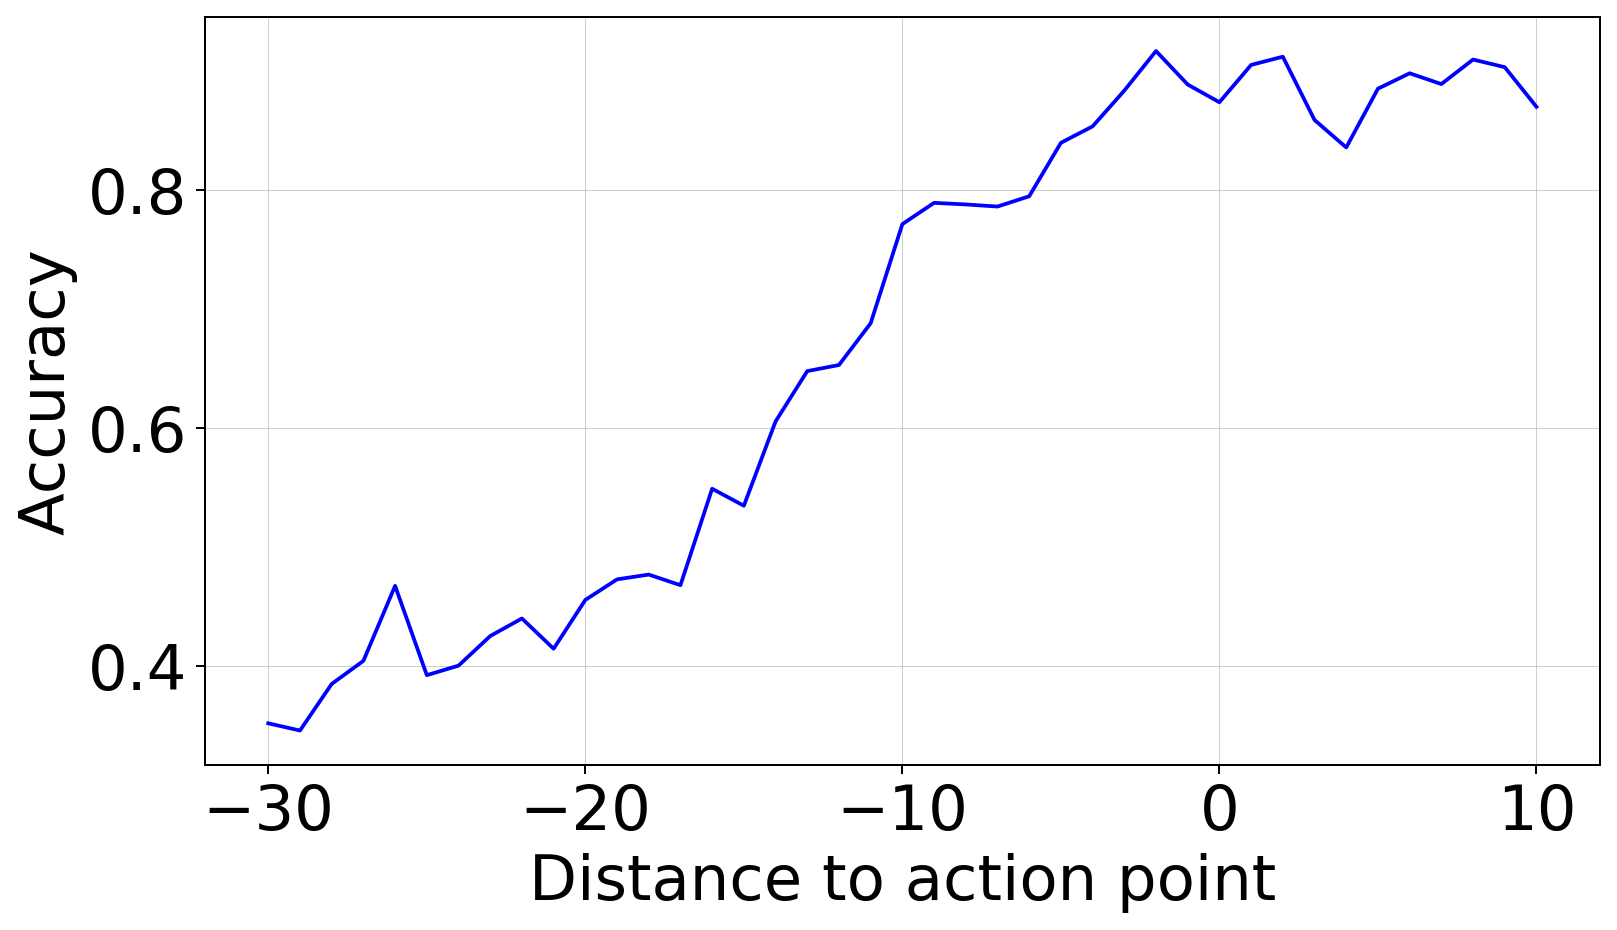

In [11]:
plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(10,5.5),dpi=180)
ran = list(range(-30,1+10))
plt.plot(ran, accuracyPerFrame,color="blue")
plt.xlabel("Distance to action point")
plt.ylabel("Accuracy")
plt.grid(linewidth=0.25)

plt.savefig(pathSaveResult+"simplifiedEarlyRecognitionBloomBoulahia", bbox_inches='tight')
plt.savefig(pathSaveResult+"simplifiedEarlyRecognitionBloomBoulahia", bbox_inches='tight',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


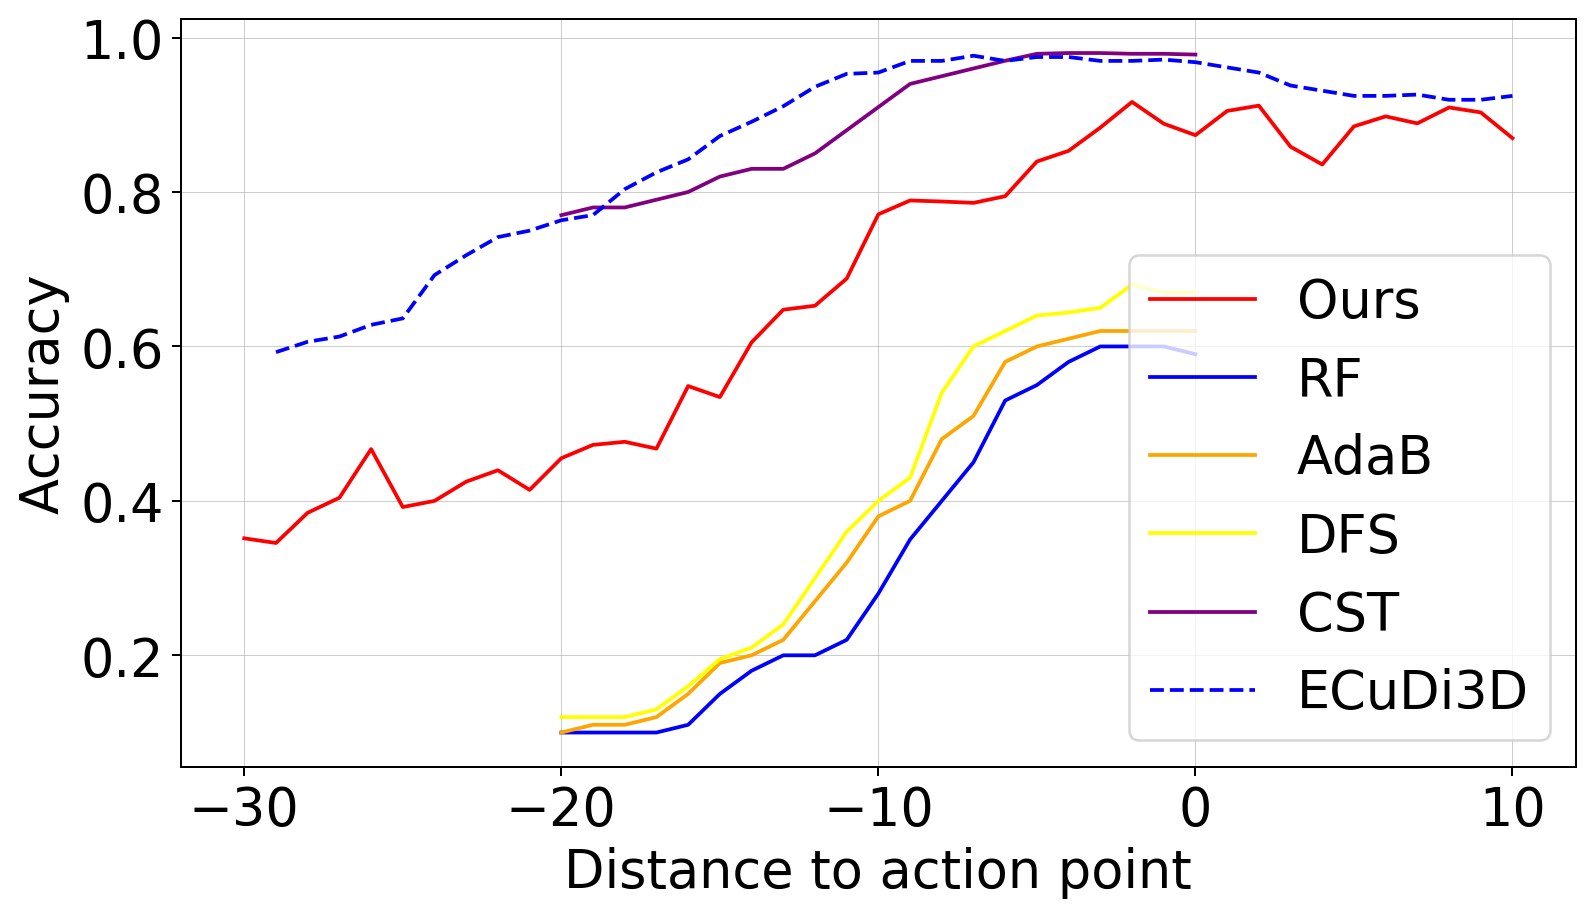

In [12]:
if True:
    plt.rcParams.update({'font.size': 21})
    plt.figure(figsize=(10,5.5),dpi=180)

    RF=[0.1,0.1,0.1,0.1,0.11,0.15,0.18,0.2,0.2,0.22,0.28,0.35,0.4,0.45,0.53,0.55,0.58,0.6,0.6,0.6,0.59]

    AdaB=[0.1,0.11,0.11,0.12,0.15,0.19,0.2,0.22,0.27,0.32,0.38,0.4,0.48,0.51,0.58,0.6,0.61,0.62,0.62,0.62,0.62]

    DFS=[0.12,0.12,0.12,0.13,0.16,0.195,0.21,0.24,0.3,0.36,0.4,0.43,0.54,0.6,0.62,0.64,0.644,0.65,0.68,0.67,0.67]

    CST=[0.77,0.78,0.78,0.79,0.8,0.82,0.83,0.83,0.85,0.88,0.91,0.94,0.95,0.96,0.97,0.979,0.98,0.98,0.979,0.979,0.978]

    ECuDi3D=[0.592592593,0.606060606,0.612794613,0.627946128,0.636363636,0.692436975,0.718120805,0.741610738,0.75,0.763422819,0.770134228,0.803691275,0.825503356,0.842281879,0.872483221,0.890939597,0.911073826,0.936241611,0.953020134,0.954697987,0.969798658,0.969798658,0.976510067,0.969798658,0.974832215,0.974832215,0.969798658,0.969798658,0.97147651,0.968120805,0.961409396,0.954697987,0.937919463,0.931208054,0.924496644,0.924496644,0.926174497,0.919463087,0.919463087,0.924496644]
    absics= list(range(-len(RF)+1,1))
    absicsBoulahia= list(range(-29,11))
    absicsMoi= list(range(-30,11))

    plt.plot(absicsMoi, accuracyPerFrame,color="red")
    plt.plot(absics, RF,color="blue")
    plt.plot(absics, AdaB,color="orange")
    plt.plot(absics, DFS,color="yellow")
    plt.plot(absics, CST,color="purple")
    plt.plot(absicsBoulahia, ECuDi3D,"--b")
    plt.xlabel("Distance to action point")
    plt.ylabel("Accuracy")
    plt.grid(linewidth=0.25)
    plt.legend(["Ours","RF","AdaB","DFS","CST","ECuDi3D"])

    plt.savefig(pathSaveResult+"simplifiedEarlyRecognitionBloomBoulahia-Comparison", bbox_inches='tight')
    plt.savefig(pathSaveResult+"simplifiedEarlyRecognitionBloomBoulahia-Comparison", bbox_inches='tight',format='eps')

In [13]:
if True:
    nbFrameBefore= 30
    precisionsAveragePerFrame:List[float] = []
    recallsAveragePerFrame:List[float] = []
    fmeasureAveragePerFrame:List[float] = []
    accuracyAveragePerFrame:List[float] = []
    res = "----Results----"
    for frameCompletion in range(nbFrameBefore+1):
        # print("frameCompletion",frameCompletion)
        res+= "\nT-"+str(nbFrameBefore-frameCompletion)+"\n"
        TP = TruePositive[frameCompletion] # vector of size nbClass
        FP = FalsePositive[frameCompletion]
        FN = FalseNegative[frameCompletion]
        nbAct = nbAction[frameCompletion]

        assert nbAct[0]==0
        # assert np.array_equal(TP+FP+FN,nbAct)
        # TP = TP[1:]
        # FP = FP[1:]
        # FN = FN[1:]
        # nbAct = nbAct[1:]
        #theses are vector of size [nbClass]
        precisionForFramePerClass = np.divide(TP, TP+FP, out=np.zeros_like(TP), where=TP+FP!=0)
        # precisionForFramePerClass = TP/(TP+FP) # TP/PredictedPositiv
        recallForFramePerClass = np.divide(TP, TP+FN, out=np.zeros_like(TP), where=TP+FN!=0)
        #recallForFramePerClass = TP/(TP+FN) # TP/RealPositiv
        numer = 2*precisionForFramePerClass*recallForFramePerClass
        denome = (precisionForFramePerClass+recallForFramePerClass)
        fmeasureForFramePerClass = np.divide(numer, denome, out=np.zeros_like(numer), where=denome!=0)
        #fmeasureForFramePerClass = 2*precisionForFramePerClass*recallForFramePerClass/(precisionForFramePerClass+recallForFramePerClass)
        accuracyForFramePerClass = np.divide(TP, nbAct, out=np.zeros_like(TP), where=nbAct!=0)
        #accuracyForFramePerClass = TP/nbAct # is equivalent to TAR, TP/All
        # print("nbAct",nbAct)
        # print("accuracyForFramePerClass",accuracyForFramePerClass)
        # print("TP",TP)
        # print("FP",FP)
        # print("FN",FN)

        res+="TP,\n"+str(" ; ".join(list(["{:.1f}".format(v) for v in TP])))+"\n"
        res+="FP,\n"+str(" ; ".join(list(["{:.1f}".format(v) for v in FP])))+"\n"
        res+="FN,\n"+str(" ; ".join(list(["{:.1f}".format(v) for v in FN])))+"\n"
        res+="nbAct,\n"+str(" ; ".join(list(["{:.1f}".format(v) for v in nbAct])))+"\n"
        res+="precisionPerClass,\n"+str(" ; ".join(list(["{:.2f}".format(v) for v in precisionForFramePerClass])))+"\n"
        res+="recallPerClass,\n"+str(" ; ".join(list(["{:.2f}".format(v) for v in recallForFramePerClass])))+"\n"
        res+="fmeasurePerClass,\n"+str(" ; ".join(list(["{:.2f}".format(v) for v in fmeasureForFramePerClass])))+"\n"
        res+="accuracyPerClass,\n"+str(" ; ".join(list(["{:.2f}".format(v) for v in accuracyForFramePerClass])))+"\n"

        # micro average
        TPsum = sum(TP)
        FPsum = sum(FP)
        FNsum = sum(FN)
        actionsSum = sum(nbAct)
        precisionForFrame = TPsum/(TPsum+FPsum) # TP/PredictedPositiv
        recallForFrame = TPsum/(TPsum+FNsum) # TP/RealPositiv
        fmeasureForFrame = 2*precisionForFrame*recallForFrame/(precisionForFrame+recallForFrame)
        # print("actionsSum",actionsSum)
        # print("TPsum",TPsum)
        # print("FPsum",FPsum)
        # print("FNsum",FNsum)
        accuracyForFrame = TPsum/actionsSum # is equivalent to TAR, TP/All
        precisionsAveragePerFrame.append(precisionForFrame)
        recallsAveragePerFrame.append(recallForFrame)
        fmeasureAveragePerFrame.append(fmeasureForFrame)
        accuracyAveragePerFrame.append(accuracyForFrame)


    print("accuracyAveragePerFrame",accuracyAveragePerFrame)
    print("fmeasureAveragePerFrame",fmeasureAveragePerFrame)
    res+="\n"
    res+="PerFrame micro-average\n"
    res+="precisionPerFrame,\n"+str(" ; ".join(list(["{:.2f}".format(v) for v in precisionsAveragePerFrame])))+"\n"
    res+="recallPerFrame,\n"+str(" ; ".join(list(["{:.2f}".format(v) for v in recallsAveragePerFrame])))+"\n"
    res+="fmeasurePerFrame,\n"+str(" ; ".join(list(["{:.2f}".format(v) for v in fmeasureAveragePerFrame])))+"\n"
    res+="accuracyPerFrame,\n"+str(" ; ".join(list(["{:.2f}".format(v) for v in accuracyAveragePerFrame])))+"\n"
    print(res)
    f = open(pathSaveResult+"resultsEarlyBoulahiaRFIAP.txt","w+")
    f.write(res)
    f.close()

    precisionForFramesPerClass = TruePositive/(TruePositive+FalsePositive) # TP/PredictedPositiv
    recallForFramesPerClass = TruePositive/(TruePositive+FalseNegative) # TP/RealPositiv
    fmeasureForFramesPerClass = 2*precisionForFramesPerClass*recallForFramesPerClass/(precisionForFramesPerClass+recallForFramesPerClass)
    accuracyForFramesPerClass = TruePositive/nbAction # is equivalent to TAR, TP/All

accuracyAveragePerFrame [0.282793867120954, 0.2989864864864865, 0.3220910623946037, 0.3372681281618887, 0.36593591905564926, 0.3348148148148148, 0.3466666666666667, 0.36, 0.37333333333333335, 0.3905325443786982, 0.4068047337278107, 0.42159763313609466, 0.44970414201183434, 0.4808259587020649, 0.5103244837758112, 0.5545722713864307, 0.5825958702064897, 0.6224188790560472, 0.6519174041297935, 0.6843657817109144, 0.7256637168141593, 0.7684365781710915, 0.7964601769911505, 0.8082595870206489, 0.8112094395280236, 0.8377581120943953, 0.8539823008849557, 0.8628318584070797, 0.8761061946902655, 0.8849557522123894, 0.8849557522123894]
fmeasureAveragePerFrame [0.25836575875486384, 0.2731481481481482, 0.29429892141756553, 0.30816640986132515, 0.33436055469953774, 0.3110805230557467, 0.3220922229869236, 0.3344803854094976, 0.34686854783207155, 0.3628865979381443, 0.3780068728522337, 0.3917525773195876, 0.41786941580756015, 0.4474948524365133, 0.4749485243651338, 0.5161290322580646, 0.5422100205902

c:\workspace2\earlyreco\recogesteprecocedeep\venv\lib\site-packages\ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in true_divide
c:\workspace2\earlyreco\recogesteprecocedeep\venv\lib\site-packages\ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in true_divide
c:\workspace2\earlyreco\recogesteprecocedeep\venv\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide
c:\workspace2\earlyreco\recogesteprecocedeep\venv\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


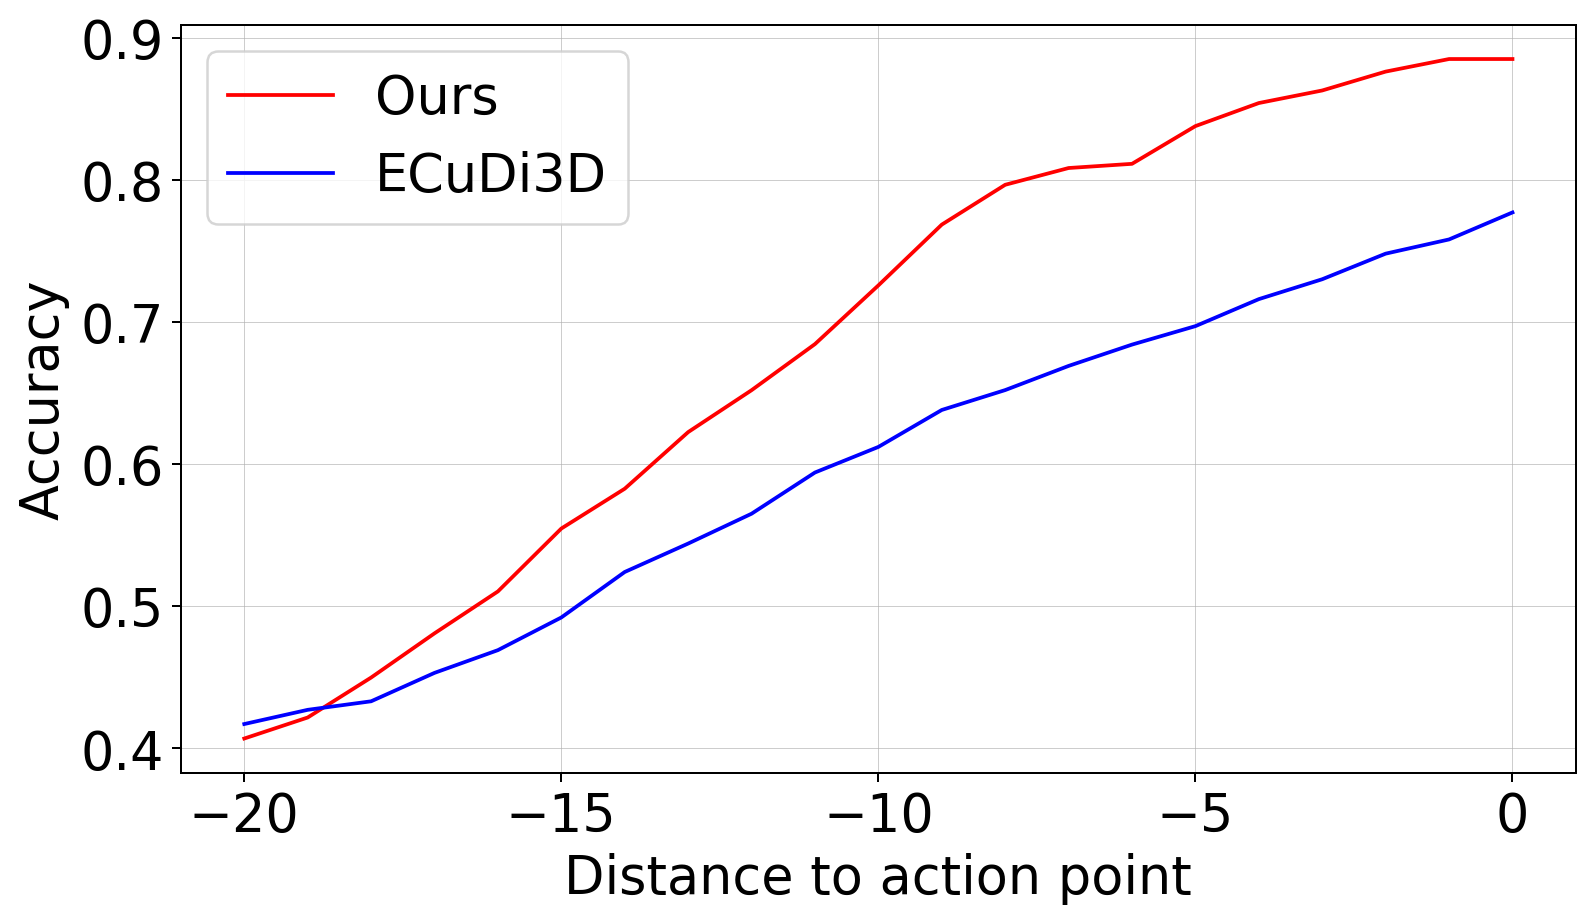

In [14]:
if True:
    boulahiaResult = [0.417, 0.427, 0.433, 0.453, 0.469, 0.492, 0.524, 0.544, 0.565, 0.594, 0.612, 0.638, 0.652, 0.669, 0.684, 0.697, 0.716, 0.73, 0.748, 0.758, 0.777]
    plt.figure(figsize=(10,5.5),dpi=180)

    absci = range(-20,1)
    plt.plot(absci, accuracyAveragePerFrame[-21:],color="red")
    plt.plot(absci, boulahiaResult,color="blue")
    plt.grid(linewidth=0.25)
    plt.xlabel('Distance to action point')
    plt.ylabel('Accuracy')
    plt.legend(["Ours","ECuDi3D"])

    plt.savefig(pathSaveResult+"EarlyRecognitionBoulahia-Comparison", bbox_inches='tight')
    plt.savefig(pathSaveResult+"EarlyRecognitionBoulahia-Comparison", bbox_inches='tight',format='eps')